<a href="https://colab.research.google.com/github/PavithNimantha/Deep-Learning-Assignment/blob/main/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten

In [34]:
# Step 1: Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X = data.data  # Features (input data)
y = data.target  # Target variable (0 = malignant, 1 = benign)

# Step 2: Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# --------------------- Simple Neural Network (Model 1) ---------------------
def build_simple_nn():
    model = Sequential([
        Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer 1
        Dense(8, activation='relu'),  # Hidden layer 2
        Dense(1, activation='sigmoid')  # Output layer
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

simple_nn_model = build_simple_nn()
simple_nn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# Evaluate Simple Neural Network
simple_nn_accuracy = simple_nn_model.evaluate(X_test, y_test, verbose=0)[1]
simple_nn_pred = (simple_nn_model.predict(X_test) > 0.5).astype("int32")
simple_nn_precision = precision_score(y_test, simple_nn_pred)
simple_nn_recall = recall_score(y_test, simple_nn_pred)
simple_nn_f1 = f1_score(y_test, simple_nn_pred)

# Print Simple Neural Network results
print("Simple Neural Network Results:")
print(f"Accuracy: {simple_nn_accuracy}")
print(f"Precision: {simple_nn_precision}")
print(f"Recall: {simple_nn_recall}")
print(f"F1 Score: {simple_nn_f1}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Simple Neural Network Results:
Accuracy: 0.9736841917037964
Precision: 0.9857142857142858
Recall: 0.971830985915493
F1 Score: 0.9787234042553191


In [36]:
# --------------------- Regularized Neural Network (Model 2) ---------------------
def build_regularized_nn():
    model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer 1
        Dropout(0.5),  # Dropout layer to prevent overfitting
        Dense(16, activation='relu'),  # Hidden layer 2
        Dense(1, activation='sigmoid')  # Output layer
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

regularized_nn_model = build_regularized_nn()
regularized_nn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# Evaluate Regularized Neural Network
regularized_nn_accuracy = regularized_nn_model.evaluate(X_test, y_test, verbose=0)[1]
regularized_nn_pred = (regularized_nn_model.predict(X_test) > 0.5).astype("int32")
regularized_nn_precision = precision_score(y_test, regularized_nn_pred)
regularized_nn_recall = recall_score(y_test, regularized_nn_pred)
regularized_nn_f1 = f1_score(y_test, regularized_nn_pred)

# Print Regularized Neural Network results
print("Regularized Neural Network Results:")
print(f"Accuracy: {regularized_nn_accuracy}")
print(f"Precision: {regularized_nn_precision}")
print(f"Recall: {regularized_nn_recall}")
print(f"F1 Score: {regularized_nn_f1}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Regularized Neural Network Results:
Accuracy: 0.9736841917037964
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.9790209790209791


In [37]:
# --------------------- Convolutional Neural Network (CNN, Model 3) ---------------------
# Reshape data for CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

def build_cnn():
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

cnn_model = build_cnn()
cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, verbose=0)

# Evaluate CNN
cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)[1]
cnn_pred = (cnn_model.predict(X_test_cnn) > 0.5).astype("int32")
cnn_precision = precision_score(y_test, cnn_pred)
cnn_recall = recall_score(y_test, cnn_pred)
cnn_f1 = f1_score(y_test, cnn_pred)

# Print CNN results
print("CNN Results:")
print(f"Accuracy: {cnn_accuracy}")
print(f"Precision: {cnn_precision}")
print(f"Recall: {cnn_recall}")
print(f"F1 Score: {cnn_f1}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
CNN Results:
Accuracy: 0.9824561476707458
Precision: 0.9726027397260274
Recall: 1.0
F1 Score: 0.9861111111111112


In [38]:
# --------------------- Deeper Neural Network (Model 4) ---------------------
def build_deeper_nn():
    model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer 1
        Dense(16, activation='relu'),  # Hidden layer 2
        Dense(8, activation='relu'),  # Hidden layer 3
        Dense(1, activation='sigmoid')  # Output layer
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

deeper_nn_model = build_deeper_nn()
deeper_nn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# Evaluate Deeper Neural Network
deeper_nn_accuracy = deeper_nn_model.evaluate(X_test, y_test, verbose=0)[1]
deeper_nn_pred = (deeper_nn_model.predict(X_test) > 0.5).astype("int32")
deeper_nn_precision = precision_score(y_test, deeper_nn_pred)
deeper_nn_recall = recall_score(y_test, deeper_nn_pred)
deeper_nn_f1 = f1_score(y_test, deeper_nn_pred)

# Print Deeper Neural Network results
print("Deeper Neural Network Results:")
print(f"Accuracy: {deeper_nn_accuracy}")
print(f"Precision: {deeper_nn_precision}")
print(f"Recall: {deeper_nn_recall}")
print(f"F1 Score: {deeper_nn_f1}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Deeper Neural Network Results:
Accuracy: 0.9649122953414917
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1 Score: 0.9722222222222222


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


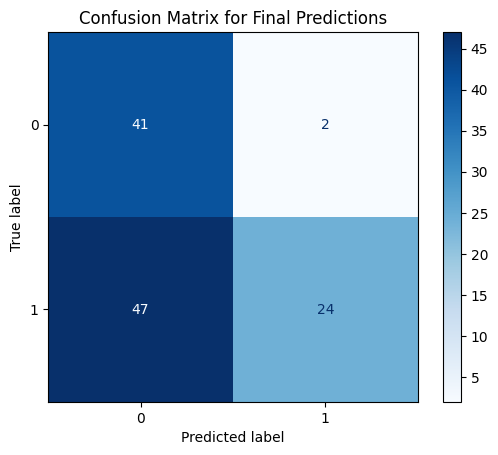

In [40]:
y_pred = model.predict(X_test)

# If it's a classification model, convert predicted probabilities to class labels
y_pred = (y_pred > 0.5).astype(int)

# Now, you can generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Final Predictions')
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


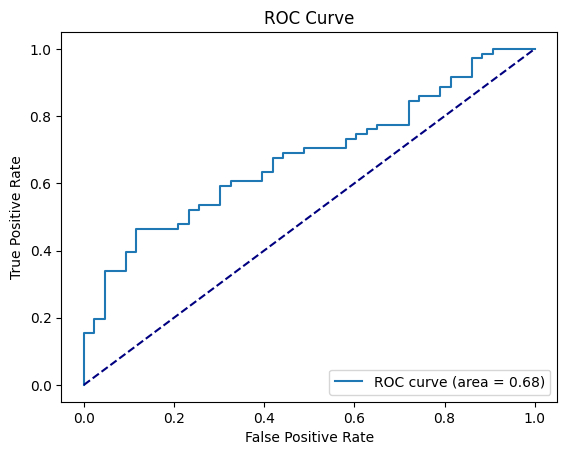

In [41]:
y_pred_proba = model.predict(X_test)  # Get predicted probabilities
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


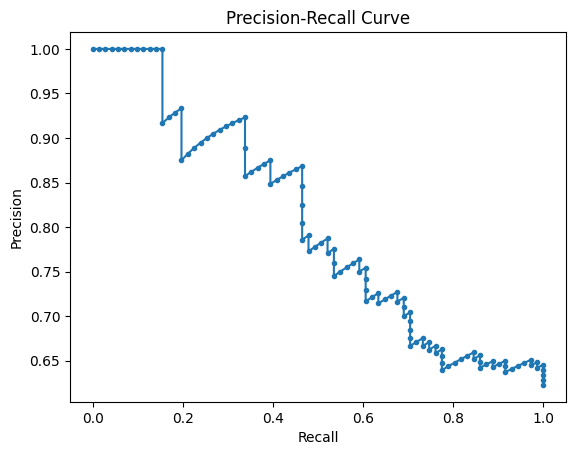

In [42]:
y_pred_proba = model.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# Plot Precision-Recall curve
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()
